## Librerías

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

## Llamado de Clases

In [3]:
from src.pipeline_procesamiento import PipelineProcesamiento
from src.utils.metrics import obtener_ruta_app
from src.Metodos_EDA_RNN import Metodos_EDA_RNN
import os

ModuleNotFoundError: No module named 'src.pipeline_procesamiento'

#### Definición de variable

In [6]:
ejecutar = PipelineProcesamiento(os.path.join(obtener_ruta_app("Template-AgroIA"), "data/raw/rnn/ESTIM_papa_2005-2025.xls"),os.path.join(obtener_ruta_app("Template-AgroIA"), "data/raw/rnn/DatosAtmosfericos"))

df= ejecutar.ejecutar_pipeline_completo()
df.head()

2025-07-10 18:27:39,438 - src.pipeline_procesamiento - INFO - Pipeline inicializado correctamente
2025-07-10 18:27:39,439 - src.pipeline_procesamiento - INFO - === INICIANDO PIPELINE COMPLETO ===
2025-07-10 18:27:39,441 - src.pipeline_procesamiento - INFO - Validación de archivos de entrada completada
2025-07-10 18:27:39,441 - src.pipeline_procesamiento - INFO - Iniciando procesamiento de datos de papa
2025-07-10 18:27:39,497 - src.procesador_datos_papa - INFO - Procesando 21 hojas del archivo Excel
2025-07-10 18:27:40,230 - src.procesador_datos_papa - INFO - Procesamiento completado: 1260 registros
2025-07-10 18:27:40,235 - src.pipeline_procesamiento - INFO - Procesamiento de datos de papa completado
2025-07-10 18:27:40,239 - src.pipeline_procesamiento - INFO - Iniciando procesamiento de datos atmosféricos
2025-07-10 18:27:40,241 - src.procesador_datos_atmosfericos - INFO - Procesando 5 archivos CSV
2025-07-10 18:27:40,375 - src.procesador_datos_atmosfericos - INFO - Se procesaron exi

,canton,mes,anio,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,...,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M
0,TURRIALBA,enero,2005,136.21,5.95,13.86,10.63,23.37,0.91,0.92,...,-999.0,210.55,91.77,18.81,17.22,18.01,25.36,14.42,1.82,0.16
1,TURRIALBA,febrero,2005,66.24,2.80,17.88,11.44,25.49,0.85,0.86,...,-999.0,117.71,88.51,18.42,16.18,17.30,25.95,13.70,1.72,0.16
2,TURRIALBA,marzo,2005,14.90,0.70,17.30,11.63,25.93,0.75,0.75,...,-999.0,50.42,85.40,20.48,17.54,19.01,26.42,14.77,1.05,0.14
3,TURRIALBA,abril,2005,60.03,2.45,16.58,11.87,26.34,0.74,0.75,...,-999.0,203.88,85.99,20.78,17.91,19.34,27.34,14.39,1.34,0.14
4,TURRIALBA,mayo,2005,140.76,4.90,16.10,12.05,26.37,0.76,0.77,...,-999.0,175.48,89.55,21.33,19.24,20.29,27.64,16.94,0.92,0.13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canton              1260 non-null   object 
 1   mes                 1260 non-null   object 
 2   anio                1260 non-null   int64  
 3   produccion          1084 non-null   float64
 4   area                1084 non-null   float64
 5   ALLSKY_SFC_SW_DWN   1260 non-null   float64
 6   CLRSKY_SFC_PAR_TOT  1260 non-null   float64
 7   CLRSKY_SFC_SW_DWN   1260 non-null   float64
 8   GWETPROF            1260 non-null   float64
 9   GWETROOT            1260 non-null   float64
 10  GWETTOP             1260 non-null   float64
 11  IMERG_PRECTOT       1260 non-null   float64
 12  PRECTOTCORR_SUM     1260 non-null   float64
 13  RH2M                1260 non-null   float64
 14  T2M                 1260 non-null   float64
 15  T2MDEW              1260 non-null   float64
 16  T2MWET

In [8]:
meses_es_en = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

# Crear columna de fecha
df['mes_en'] = df['mes'].map(meses_es_en)
df['fecha'] = pd.to_datetime(df['mes_en'] + ' ' + df['anio'].astype(str), format='%B %Y')

# Eliminar columnas unificadas
df.drop(columns=['mes', 'anio', 'mes_en'], inplace=True)



# Limpieza final

In [9]:
df.head()

,canton,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
0,TURRIALBA,136.21,5.95,13.86,10.63,23.37,0.91,0.92,0.90,-999.0,210.55,91.77,18.81,17.22,18.01,25.36,14.42,1.82,0.16,2005-01-01
1,TURRIALBA,66.24,2.80,17.88,11.44,25.49,0.85,0.86,0.86,-999.0,117.71,88.51,18.42,16.18,17.30,25.95,13.70,1.72,0.16,2005-02-01
2,TURRIALBA,14.90,0.70,17.30,11.63,25.93,0.75,0.75,0.76,-999.0,50.42,85.40,20.48,17.54,19.01,26.42,14.77,1.05,0.14,2005-03-01
3,TURRIALBA,60.03,2.45,16.58,11.87,26.34,0.74,0.75,0.76,-999.0,203.88,85.99,20.78,17.91,19.34,27.34,14.39,1.34,0.14,2005-04-01
4,TURRIALBA,140.76,4.90,16.10,12.05,26.37,0.76,0.77,0.79,-999.0,175.48,89.55,21.33,19.24,20.29,27.64,16.94,0.92,0.13,2005-05-01


In [10]:
df.drop(['IMERG_PRECTOT'], axis=1,inplace=True) #Eliminar variable basura

### Correlaciones con la variable "produccion"

In [11]:
print(df.corr(numeric_only=True)['produccion'].sort_values())

area                 -0.217514
PRECTOTCORR_SUM      -0.024943
T2M_MAX               0.035282
T2M                   0.035318
T2M_MIN               0.035551
T2MWET                0.035697
T2MDEW                0.036074
WS2M                  0.036484
GWETTOP               0.036666
GWETPROF              0.036667
GWETROOT              0.036672
WS10M                 0.036679
RH2M                  0.039920
ALLSKY_SFC_SW_DWN     0.054027
CLRSKY_SFC_PAR_TOT    0.054455
CLRSKY_SFC_SW_DWN     0.054700
produccion            1.000000
Name: produccion, dtype: float64


### Reemplazo de los valores -999

In [12]:
df.replace(-999, np.nan, inplace=True)

### Eliminación de filas después de junio del 2025

In [13]:
df = df[~((df['fecha'].dt.year == 2025) & (df['fecha'].dt.month > 6))]


### Histogramas para variables numéricas

array([[<Axes: title={'center': 'produccion'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'ALLSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'CLRSKY_SFC_PAR_TOT'}>],
       [<Axes: title={'center': 'CLRSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'GWETPROF'}>,
        <Axes: title={'center': 'GWETROOT'}>,
        <Axes: title={'center': 'GWETTOP'}>],
       [<Axes: title={'center': 'PRECTOTCORR_SUM'}>,
        <Axes: title={'center': 'RH2M'}>,
        <Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'T2MDEW'}>],
       [<Axes: title={'center': 'T2MWET'}>,
        <Axes: title={'center': 'T2M_MAX'}>,
        <Axes: title={'center': 'T2M_MIN'}>,
        <Axes: title={'center': 'WS10M'}>],
       [<Axes: title={'center': 'WS2M'}>,
        <Axes: title={'center': 'fecha'}>, <Axes: >, <Axes: >]],
      dtype=object)

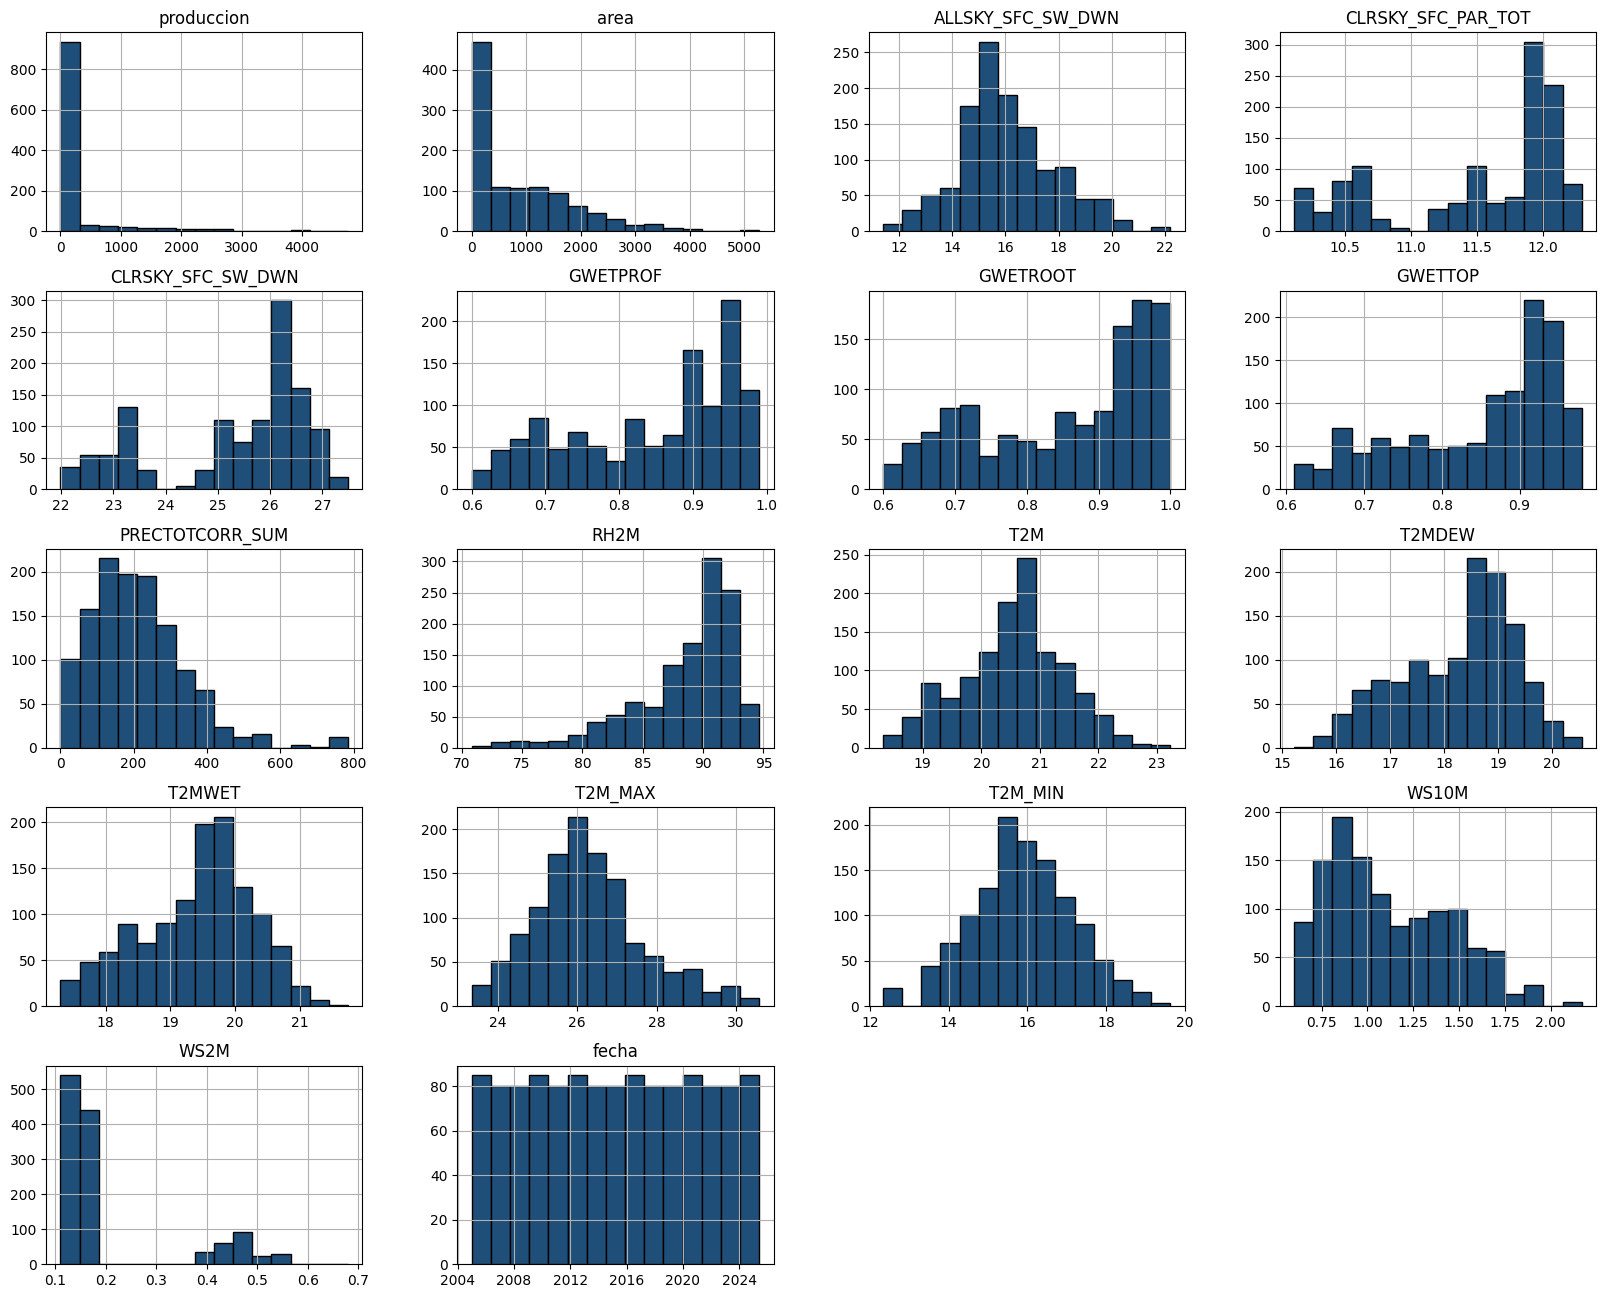

In [14]:
df.hist(bins=15, figsize=(20, 16), color='#1F4E79', edgecolor='black')

In [15]:
df.describe()

,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
count,1076.000000,1076.000000,1210.000000,1210.000000,1210.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1230
mean,232.274233,879.257290,16.017893,11.509256,25.295413,0.843306,0.854229,0.849339,211.043567,88.682539,20.536563,18.267935,19.402302,26.301624,15.861845,1.117951,0.208645,2015-03-17 12:35:07.317073152
min,0.049000,0.180000,11.380000,10.120000,21.990000,0.600000,0.600000,0.610000,0.860000,70.830000,18.320000,15.220000,17.300000,23.340000,12.330000,0.600000,0.110000,2005-01-01 00:00:00
25%,14.158750,77.625000,14.880000,10.750000,23.770000,0.740000,0.740000,0.770000,117.710000,86.870000,19.990000,17.490000,18.850000,25.430000,14.970000,0.830000,0.140000,2010-02-01 00:00:00
50%,47.512500,564.414000,15.790000,11.860000,25.970000,0.880000,0.900000,0.890000,196.150000,90.070000,20.620000,18.530000,19.530000,26.180000,15.850000,1.040000,0.150000,2015-03-16 12:00:00
75%,90.052500,1420.515000,17.060000,12.010000,26.340000,0.940000,0.960000,0.930000,283.500000,91.610000,21.110000,19.040000,19.990000,27.010000,16.730000,1.390000,0.160000,2020-05-01 00:00:00
max,4761.660000,5278.000000,22.220000,12.290000,27.490000,0.990000,1.000000,0.980000,785.070000,94.650000,23.230000,20.550000,21.750000,30.590000,19.640000,2.170000,0.680000,2025-06-01 00:00:00
std,591.237025,943.119614,1.815154,0.654104,1.445203,0.110951,0.116889,0.100715,129.499296,4.242605,0.877697,1.058779,0.865479,1.377794,1.279100,0.334843,0.133187,NaN


### BoxPlot para "area" y "produccion"

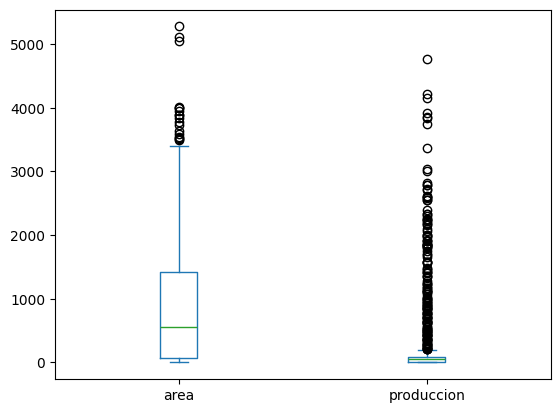

In [16]:
df[['area', 'produccion']].plot.box()
plt.show()

### Gráfico de Densidad

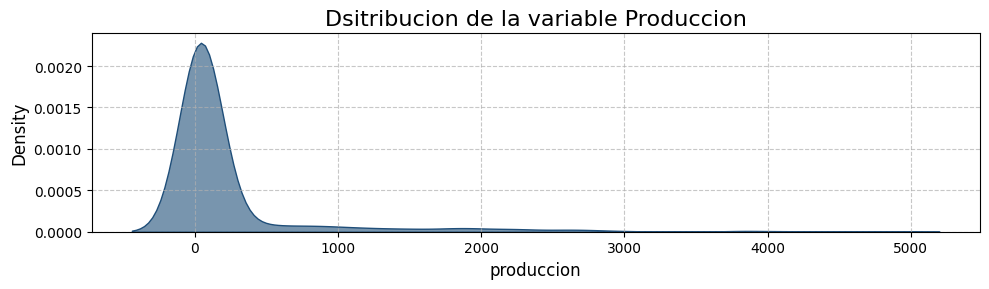

In [19]:
plt.figure(figsize=(10, 3))
sns.kdeplot(df['produccion'], fill=True, color='#1F4E79', alpha=0.6)
plt.title('Dsitribucion de la variable Produccion', fontsize=16)
plt.xlabel('produccion', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
df.sort_values(by=['produccion'], ascending=False)

,canton,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
44,CARTAGO,4761.66,226.65,14.77,11.92,26.04,0.96,0.98,0.95,308.52,93.82,20.29,19.07,19.68,25.93,16.37,0.78,0.13,2005-09-01
42,CARTAGO,4211.09,160.48,16.50,12.05,26.28,0.91,0.93,0.91,205.64,91.62,20.87,19.20,20.04,26.88,16.80,0.88,0.14,2005-07-01
163,CARTAGO,4148.95,206.01,16.22,12.18,26.53,0.88,0.90,0.89,183.07,91.31,20.35,18.64,19.50,25.44,16.23,0.78,0.15,2007-08-01
223,CARTAGO,3920.76,185.90,15.78,12.10,26.42,0.95,0.96,0.94,305.76,91.62,20.29,18.62,19.45,25.46,16.77,0.88,0.15,2008-08-01
14,OREAMUNO,3857.77,152.43,17.30,11.63,25.93,0.75,0.75,0.76,50.42,85.40,20.48,17.54,19.01,26.42,14.77,1.05,0.14,2005-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,OREAMUNO,NaN,NaN,17.11,11.21,24.71,0.84,0.84,0.84,57.69,88.61,19.99,17.70,18.85,26.03,15.61,1.46,0.15,2025-02-01
1224,EL GUARCO,NaN,NaN,15.63,10.43,22.81,0.91,0.92,0.91,112.80,84.88,20.97,18.12,19.55,25.23,16.90,0.99,0.44,2025-01-01
1236,CARTAGO,NaN,NaN,15.63,10.43,22.81,0.91,0.92,0.90,122.30,91.29,19.89,18.14,19.01,24.42,14.90,1.42,0.14,2025-01-01
1237,CARTAGO,NaN,NaN,17.11,11.21,24.71,0.84,0.84,0.84,57.69,88.61,19.99,17.70,18.85,26.03,15.61,1.46,0.15,2025-02-01


### Rellenar NaN

In [21]:
df.fillna(method='ffill', inplace=True)

C:\Users\Fiorella Victoria\AppData\Local\Temp\ipykernel_1804\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [22]:
print(df)

         canton  produccion        area  ALLSKY_SFC_SW_DWN  \
0     TURRIALBA     136.210     5.95000              13.86   
1     TURRIALBA      66.240     2.80000              17.88   
2     TURRIALBA      14.900     0.70000              17.30   
3     TURRIALBA      60.030     2.45000              16.58   
4     TURRIALBA     140.760     4.90000              16.10   
...         ...         ...         ...                ...   
1249   ALVARADO       7.000   181.33000              17.11   
1250   ALVARADO      26.740   596.40840              17.11   
1251   ALVARADO      95.921  2446.57440              17.11   
1252   ALVARADO     101.941  3172.63104              17.11   
1253   ALVARADO      94.213  3328.86636              17.11   

      CLRSKY_SFC_PAR_TOT  CLRSKY_SFC_SW_DWN  GWETPROF  GWETROOT  GWETTOP  \
0                  10.63              23.37      0.91      0.92     0.90   
1                  11.44              25.49      0.85      0.86     0.86   
2                  11.63   

In [23]:
print(df.isnull().sum())

canton                0
produccion            0
area                  0
ALLSKY_SFC_SW_DWN     0
CLRSKY_SFC_PAR_TOT    0
CLRSKY_SFC_SW_DWN     0
GWETPROF              0
GWETROOT              0
GWETTOP               0
PRECTOTCORR_SUM       0
RH2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
WS10M                 0
WS2M                  0
fecha                 0
dtype: int64


### Combinaciones de cantones y fechas mensuales

In [24]:

# Crear rango de fechas mensuales de enero 2005 a mayo 2025
fechas = pd.date_range(start='2005-01-01', end='2025-05-01', freq='MS')  # MS = Month Start

# Obtener lista única de cantones
cantones = df['canton'].unique()

# Crear todas las combinaciones posibles
combinaciones = pd.MultiIndex.from_product([cantones, fechas], names=['canton', 'fecha']).to_frame(index=False)


In [25]:
# Asegurar que Fecha en df está al inicio del mes
df['fecha'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

# Crear DataFrame con los registros existentes
df_existente = df[['canton', 'fecha']].drop_duplicates()

# Hacer merge para ver cuáles combinaciones faltan
faltantes = combinaciones.merge(df_existente, on=['canton', 'fecha'], how='left', indicator=True)

# Filtrar solo las combinaciones que NO están en el df
faltantes = faltantes[faltantes['_merge'] == 'left_only'].drop(columns=['_merge'])
print(faltantes)

Empty DataFrame
Columns: [canton, fecha]
Index: []


In [26]:
print(df.corr(numeric_only=True)['produccion'].sort_values())

area                 -0.193513
T2M                  -0.175105
WS2M                 -0.159348
T2MWET               -0.121447
T2M_MAX              -0.113859
T2M_MIN              -0.109917
PRECTOTCORR_SUM      -0.065185
T2MDEW               -0.053855
ALLSKY_SFC_SW_DWN    -0.024296
WS10M                 0.016751
GWETTOP               0.028813
GWETPROF              0.028877
GWETROOT              0.033210
CLRSKY_SFC_SW_DWN     0.044501
CLRSKY_SFC_PAR_TOT    0.052540
RH2M                  0.108443
produccion            1.000000
Name: produccion, dtype: float64


In [27]:
df = df.drop([
    'WS10M',
    'GWETTOP',
    'GWETPROF',
    'GWETROOT',
    'ALLSKY_SFC_SW_DWN',
    'CLRSKY_SFC_SW_DWN',
    'CLRSKY_SFC_PAR_TOT'
],axis=1)


<Axes: >

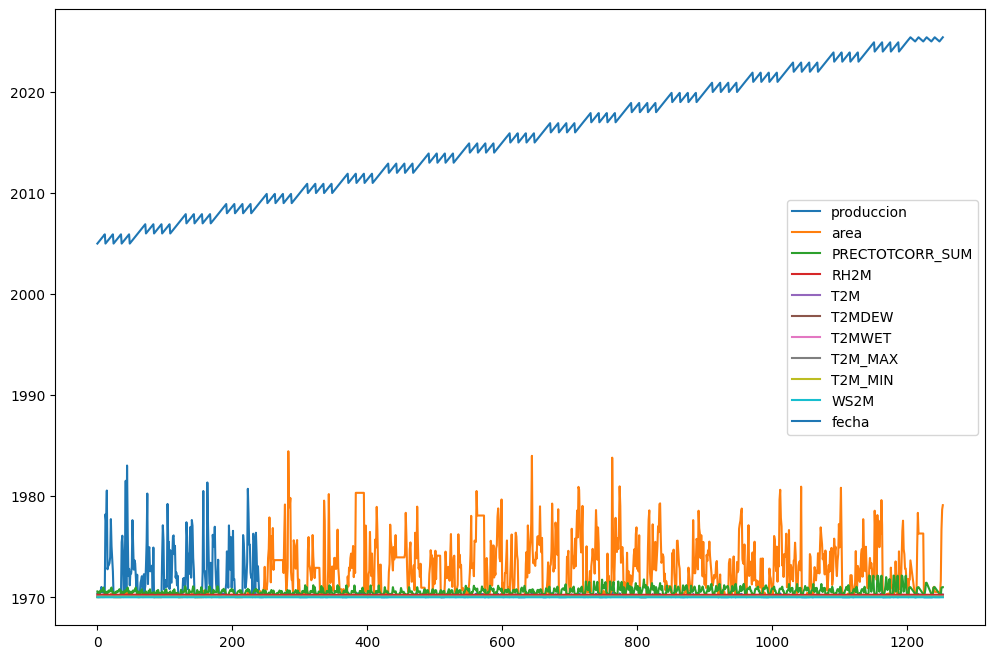

In [28]:
df.plot(figsize=(12,8))

### Preparación de variable categórica

In [29]:
#Prepara la variable categorica
df['canton_id'] = df['canton'].astype('category').cat.codes
num_cantones = df['canton_id'].nunique()


In [30]:
df= df.drop('canton',axis=1)

### Normalización de variables numéricas

In [34]:
scaler = MinMaxScaler()
features_to_scale = ['area', 'PRECTOTCORR_SUM', 'RH2M', 'T2M', 'T2MDEW',
       'T2MWET', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'canton_id']  #  variables numéricas
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [35]:
df.head()

,produccion,area,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS2M,fecha,canton_id
0,136.21,0.001093,0.267390,0.879093,0.099796,0.375235,0.159551,0.278621,0.285910,0.087719,2005-01-01,1.0
1,66.24,0.000496,0.149003,0.742233,0.020367,0.180113,0.000000,0.360000,0.187415,0.087719,2005-02-01,1.0
2,14.90,0.000099,0.063197,0.611671,0.439919,0.435272,0.384270,0.424828,0.333789,0.052632,2005-03-01,1.0
3,60.03,0.000430,0.258885,0.636440,0.501018,0.504690,0.458427,0.551724,0.281806,0.052632,2005-04-01,1.0
4,140.76,0.000894,0.222670,0.785894,0.613035,0.754221,0.671910,0.593103,0.630643,0.035088,2005-05-01,1.0


In [1]:
base_path = obtener_ruta_app("TemplateAgroIA")  # C:\Template-AgroIA
file_path = os.path.join(base_path, "data", "processed", "rnn", "rnn_produccion.csv")
df.to_csv(file_path, index=False)

NameError: name 'obtener_ruta_app' is not defined